In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
total = [100 for i in range(14)]
class1 = [100 - i * 2 for i in range(14)]

# generate dates for some period of time, only dates, no exact time needed 
dates = pd.date_range(start = '2020-05-01', end = '2020-05-14', freq = 'D')


# some magic for dates because it worked incorrectly for me
def get_date(timestamp):
    return timestamp.date()

dates = list(map(get_date, dates))

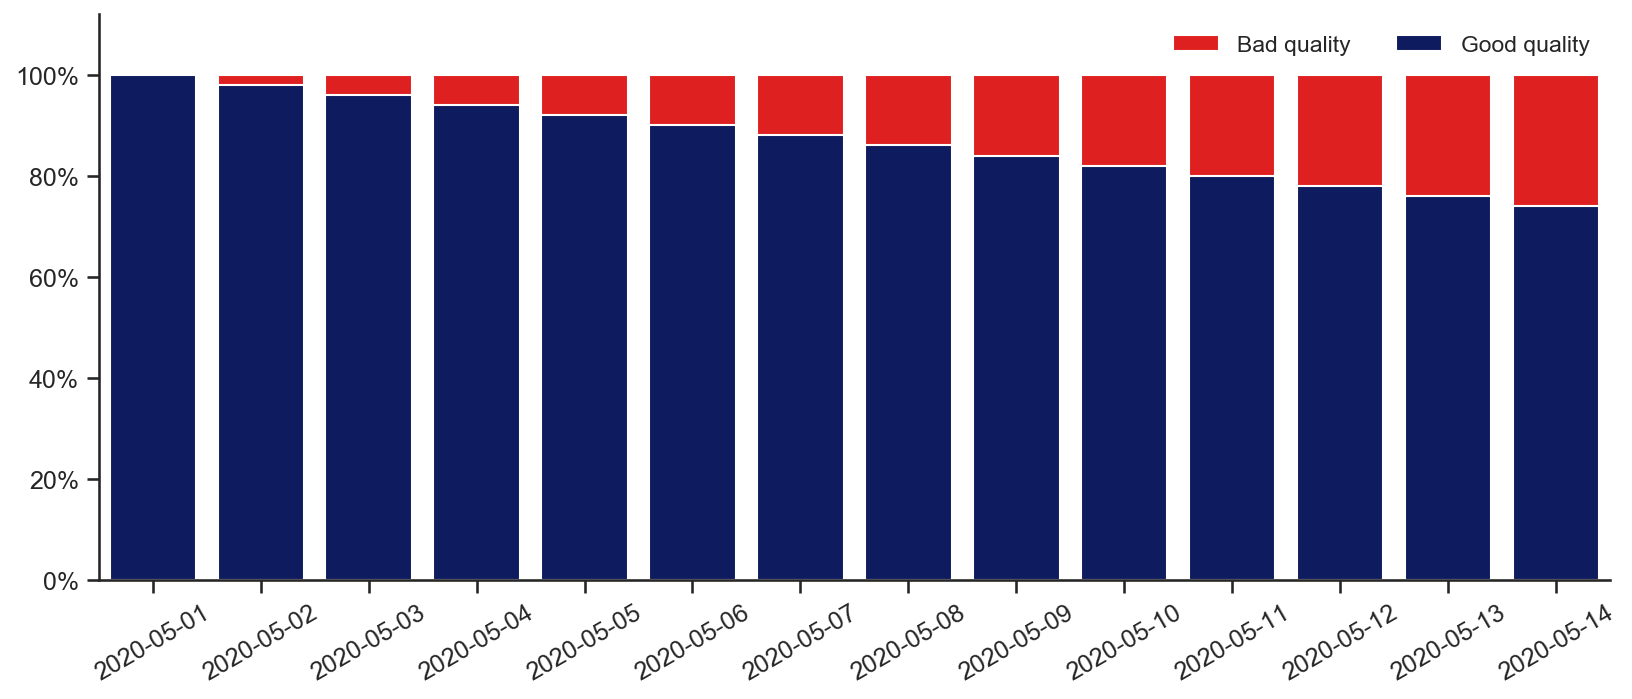

In [5]:
sns.set(style="ticks", rc={"lines.linewidth": 5, 'axes.grid' : False})

# set figure size and resolution (dpi)
plt.figure(figsize = (13, 5), dpi = 150)

# rotate X tick labels because dates took a lot of space in horizontal position
plt.xticks(rotation = 30)

# we use a small hack here because seaborn can not work with accumulation 
# for bar plots properly, so we use total count and count of one of 2 classes
sns.barplot(x = dates, y = total, label="Bad quality", color = '#ff0000')
ax = sns.barplot(x = dates, y= class1, label="Good quality", color = '#02126C')

# we use upper bound = 112 for correct showing the legend 
# try to use 100 instead
ax.set_ylim((0, 112))

# we want to change Y ticks labels instead of 100.0 we wanna see 100%
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(int(x)) + '%'))

# set tick labels size
ax.tick_params(labelsize = 12)

# set parameters for the legend of the graph
ax.legend(ncol = 2, loc = "upper right", frameon = False)
sns.despine()